In [43]:
%run code/WidgetsLive.ipynb
%run code/ShowCutouts.ipynb
%run code/ShowPS1.ipynb
%run code/HandleFilterRow.ipynb

# A Marshall for Lasair filter output
Show lightcurve and cutouts from given Lasair topic
with option to build veto list (dont show me this object again),
as well as favourite list, each with a reason given. 
Stored on users own machine.
This notebook only works with [Kafka-streamed filters](https://lasair.readthedocs.io/en/main/core_functions/alert-streams.html).
After you change your filter to Kafka streaming, it will take a few days for 
alerts to accumulate. 
- First find the topic name in your filter page, and put it in the next cell. Or uncomment one of the samples.

In [44]:
# Uncomment one of these or put in your own
my_topic     = 'lasair_6ZooniverseTestSN-likecandidatesinlast14days'
#my_topic     = 'lasair_418SN-likethings'
#my_topic     = 'lasair_23CLQ-candidates'
# my_topic    = '....'

The `group_id` is like a bookmark: the kafka server remembers the last alert it gave you. 
[More here about `group_id`](https://lasair.readthedocs.io/en/main/core_functions/alert-streams.html).
- Choose a new arbitrary string in the next cell

In [45]:
group_id     = 'roysgroupid992'

The function `group_id_to_end()` is a convenience if you want the bookmark all the way to end. 
You will then need to wait a few days for fresh alerts to accumulate.

In [46]:
# Should normally be commented out.
#group_id_to_end(kafka_server, group_id, my_topic)

- You will need to set your Lasair API token in a file called `settings.py`.

In [47]:
# settings.py has a single line like
# API_TOKEN = '8c97c954dxxxxxxxxxxxxxxxxxxxxxxxxxxxx'
token         = settings.API_TOKEN

Some parameters to drive the Marshall

In [48]:
lasairUrl     = "https://lasair-ztf.lsst.ac.uk/"
kafka_server = 'kafka.lsst.ac.uk:9092'

# Once a pages is finished, just run the last run() cell again for more
alertsPerPage = 10

# Much faster without images
renderImages = True

# This is where the vetos and favourites are stored
vetoFile      = my_topic + 'veto.txt'
faveFile      = my_topic + 'fave.txt'

You can now run the last cell of this notebook repeatedly (the `run()` function), 
until there are no more. You can check the 'veto' box and you won't see that object
again. Similarly with the 'fave' box for favourites. You can write a reason
along with the checkbox. Remember to click button 'Save veto/fave' at the bottom of 
the page to save your choices. Then come back in a day or more and look at more.

Connected to Kafka
Fetching ['ZTF23abhsglj', 'ZTF22aaedsyt', 'ZTF23abffvrm', 'ZTF23aagpjyp', 'ZTF23abhsglj', 'ZTF22aboixlf', 'ZTF23abjsthx', 'ZTF23abizggb', 'ZTF22aahzhgk', 'ZTF23aavmthe']
Object data fetched in 2 seconds


objectId,ramean,decmean,mjdmin,mjdmax,magrmin,rmag,classification,score,UTC
ZTF22aboixlf,159.434530,39.816047,60231.473032,60252.490382,18.800300,19.109100,SN,Within 2arcsec of PS1 star,2023-11-04 13:01:56


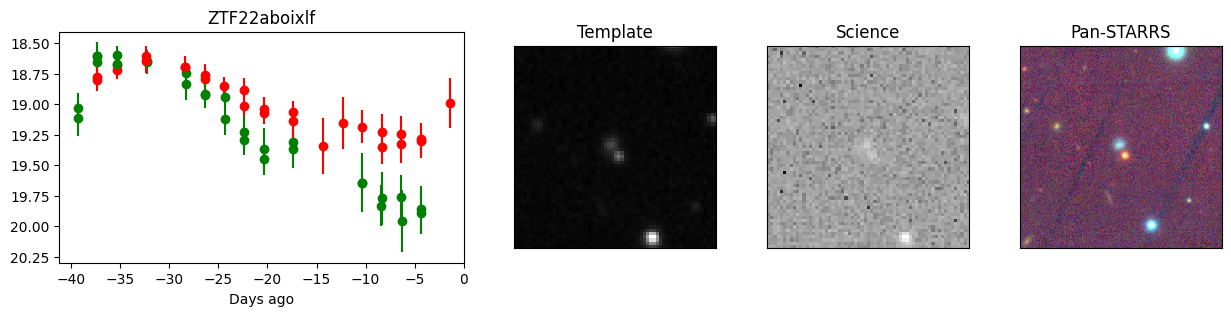

objectId,ramean,decmean,mjdmin,mjdmax,magrmin,rmag,classification,score,UTC
ZTF23abjsthx,162.247400,23.288210,60230.518646,60252.488032,18.494600,18.776800,SN,Within 2arcsec of PS1 star,2023-11-04 13:01:56


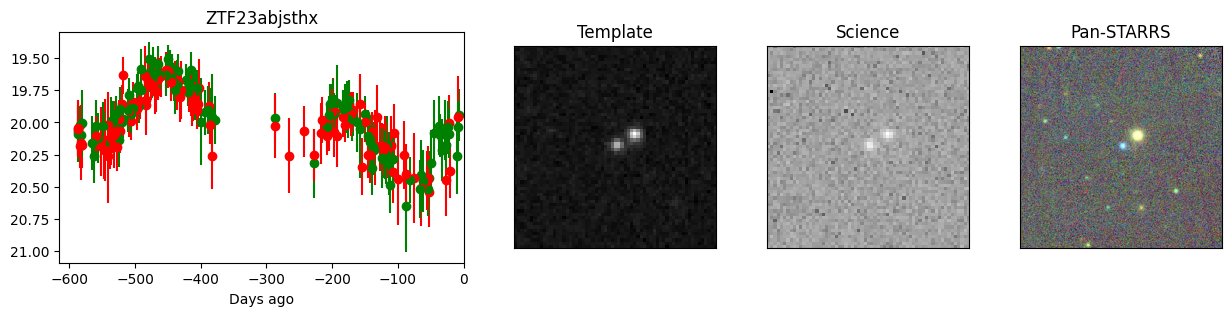

objectId,ramean,decmean,mjdmin,mjdmax,magrmin,rmag,classification,score,UTC
ZTF22aaedsyt,272.681934,39.370744,60224.132870,60253.118090,19.956300,19.956300,SN,Within 2arcsec of PS1 star,2023-11-05 03:36:22


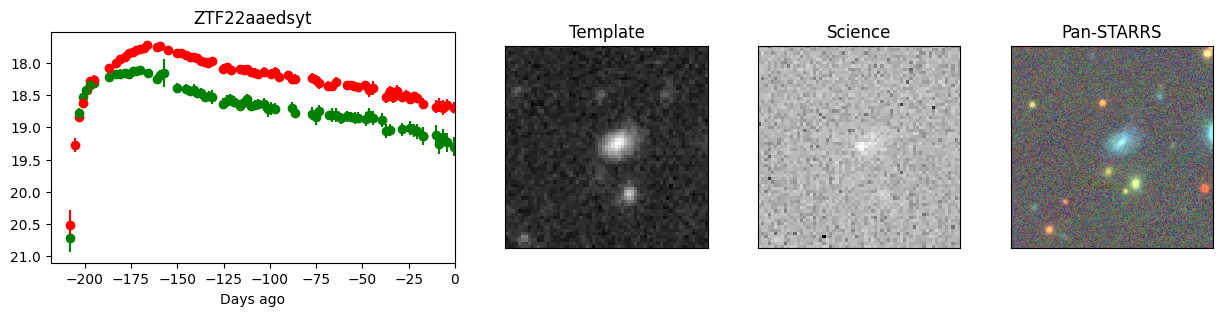

objectId,ramean,decmean,mjdmin,mjdmax,magrmin,rmag,classification,score,UTC
ZTF23abffvrm,269.386402,13.435988,60224.146123,60253.130776,17.195000,18.178200,SN,Not Near PS1 star,2023-11-05 03:52:31


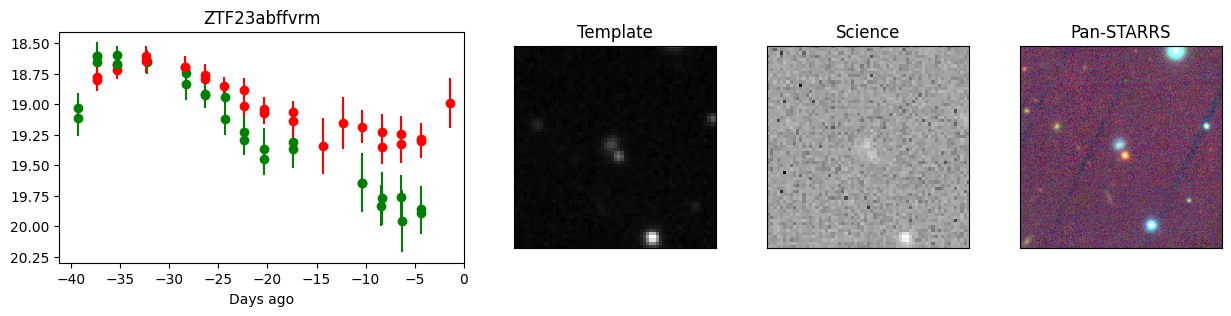

objectId,ramean,decmean,mjdmin,mjdmax,magrmin,rmag,classification,score,UTC
ZTF23abizggb,257.304921,76.857304,60224.201528,60253.135556,18.241500,18.793400,SN,Not Near PS1 star,2023-11-05 04:31:16


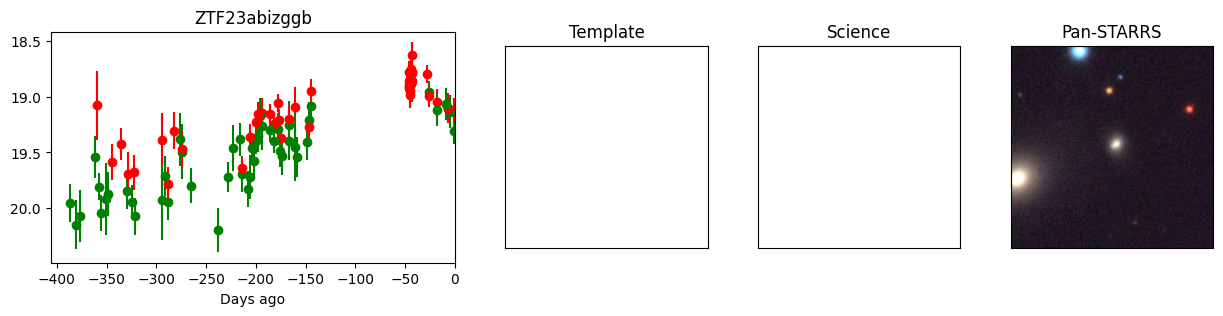

objectId,ramean,decmean,mjdmin,mjdmax,magrmin,rmag,classification,score,UTC
ZTF22aahzhgk,291.933986,25.241983,60224.129549,60253.140799,18.808000,19.202500,SN,Within 2arcsec of PS1 star,2023-11-05 05:07:54


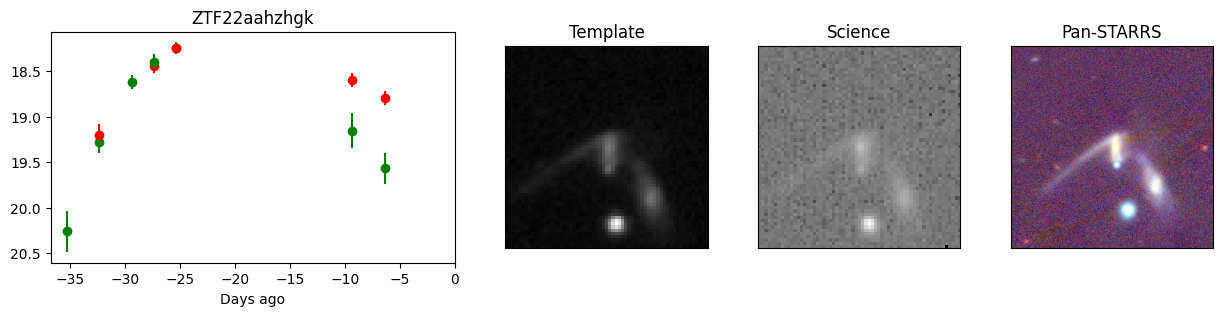

In [49]:
run(token, kafka_server, group_id, my_topic, alertsPerPage, renderImages)